loading dataset: 100%|██████████| 300/300 [00:02<00:00, 107.85it/s]


writer shape: torch.Size([8])
character shape: torch.Size([8])
reference shape: torch.Size([8, 4, 128, 128])
template shape: torch.Size([8, 1, 128, 128])
script shape: torch.Size([8, 1, 128, 128])
result shape: torch.Size([8, 1, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


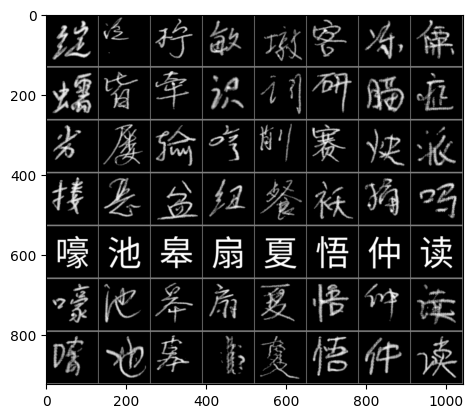

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils.dataset import CharacterDataset
from utils.function import plot_sample
from model.generator import SynthesisGenerator

batch_size = 8
reference_count = 4
path = '/home/xuexiangyuan/data/metascript'
pretrain = './checkpoint/training_20231210151741/iteration_30000/generator.pth'
dataset = CharacterDataset(path, reference_count=reference_count)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
generator = SynthesisGenerator(reference_count=reference_count)
generator.load_state_dict(torch.load(pretrain, map_location='cpu'))

for reference, writer, template, character, script in loader:
    print('writer shape: {}'.format(writer.shape))
    print('character shape: {}'.format(character.shape))
    print('reference shape: {}'.format(reference.shape))
    print('template shape: {}'.format(template.shape))
    print('script shape: {}'.format(script.shape))
    result, structure, style = generator(reference, template)
    print('result shape: {}'.format(result.shape))
    sample = plot_sample(reference, template, script, result)
    plt.figure()
    plt.imshow(sample.transpose(1, 2, 0))
    break